## Task Scenario:
You're working on a basic image processing application. You're given a simple grayscale image represented as a NumPy array where each pixel value indicates intensity (0 for black, 255 for white). You need to perform some fundamental operations.

## Image Representation: 
 
 
Create a 2D NumPy array (e.g., 10x10) to represent a grayscale image. Initialize it with random integer pixel values between 0 and 255.

In [9]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)  # for consistent results
image = np.random.randint(0, 256, size=(10, 10))

image

array([[172,  47, 117, 192,  67, 251, 195, 103,   9, 211],
       [ 21, 242,  36,  87,  70, 216,  88, 140,  58, 193],
       [230,  39,  87, 174,  88,  81, 165,  25,  77,  72],
       [  9, 148, 115, 208, 243, 197, 254,  79, 175, 192],
       [ 82,  99, 216, 177, 243,  29, 147, 147, 142, 167],
       [ 32, 193,   9, 185, 127,  32,  31, 202, 244, 151],
       [163, 254, 203, 114, 183,  28,  34, 128, 128, 164],
       [ 53, 133,  38, 232, 244,  17,  79, 132, 105,  42],
       [186,  31, 120,   1,  65, 231, 169,  57,  35, 102],
       [119,  11, 174,  82,  91, 128, 142,  99,  53, 140]], dtype=int32)

## Display (Conceptual): 
 
 
Describe how you would conceptually "display" this image (e.g., using a library like Matplotlib, though you don't need to actually plot it unless you wish to).
 


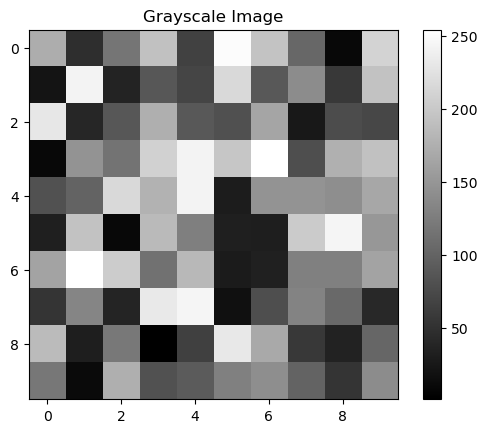

In [8]:
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.colorbar()
plt.show()

## Grayscale Inversion: 
 
 
Invert the image (black becomes white, white becomes black). For a pixel value p, the inverted value is 255 - p.
 

In [11]:
inverted_image = 255 - image
inverted_image

array([[ 83, 208, 138,  63, 188,   4,  60, 152, 246,  44],
       [234,  13, 219, 168, 185,  39, 167, 115, 197,  62],
       [ 25, 216, 168,  81, 167, 174,  90, 230, 178, 183],
       [246, 107, 140,  47,  12,  58,   1, 176,  80,  63],
       [173, 156,  39,  78,  12, 226, 108, 108, 113,  88],
       [223,  62, 246,  70, 128, 223, 224,  53,  11, 104],
       [ 92,   1,  52, 141,  72, 227, 221, 127, 127,  91],
       [202, 122, 217,  23,  11, 238, 176, 123, 150, 213],
       [ 69, 224, 135, 254, 190,  24,  86, 198, 220, 153],
       [136, 244,  81, 173, 164, 127, 113, 156, 202, 115]], dtype=int32)

## Thresholding: 
 
 
Apply a simple thresholding operation: all pixels below a certain value (e.g., 128) become 0 (black), and all pixels equal to or above become 255 (white).

In [12]:
# Apply thresholding: if pixel < 128 -> 0, else -> 255
thresholded_image = np.where(image < 128, 0, 255)
thresholded_image

array([[255,   0,   0, 255,   0, 255, 255,   0,   0, 255],
       [  0, 255,   0,   0,   0, 255,   0, 255,   0, 255],
       [255,   0,   0, 255,   0,   0, 255,   0,   0,   0],
       [  0, 255,   0, 255, 255, 255, 255,   0, 255, 255],
       [  0,   0, 255, 255, 255,   0, 255, 255, 255, 255],
       [  0, 255,   0, 255,   0,   0,   0, 255, 255, 255],
       [255, 255, 255,   0, 255,   0,   0, 255, 255, 255],
       [  0, 255,   0, 255, 255,   0,   0, 255,   0,   0],
       [255,   0,   0,   0,   0, 255, 255,   0,   0,   0],
       [  0,   0, 255,   0,   0, 255, 255,   0,   0, 255]])

## Cropping: 
 
 
Extract a smaller "region of interest" (e.g., a 4x4 sub-image from the center) using array slicing.
 
 

In [13]:
# Get 4x4 center region (rows 3-6, cols 3-6)
cropped_image = image[3:7, 3:7]
cropped_image

array([[208, 243, 197, 254],
       [177, 243,  29, 147],
       [185, 127,  32,  31],
       [114, 183,  28,  34]], dtype=int32)

## Edge Detection (Simple - Convolution Concept): 
 
 
Implement a very basic horizontal edge detection filter. This can be done by applying a convolution kernel (e.g., [-1, 0, 1] horizontally) to each row. For simplicity, you can just calculate the difference between adjacent pixels image[i, j+1] - image[i, j] for each pixel. Handle boundaries carefully (e.g., by skipping the last column).
 
 
 

In [14]:
edges = np.zeros_like(image, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1] - 1):
        edges[i, j] = int(image[i, j+1]) - int(image[i, j])

edges

array([[-125,   70,   75, -125,  184,  -56,  -92,  -94,  202,    0],
       [ 221, -206,   51,  -17,  146, -128,   52,  -82,  135,    0],
       [-191,   48,   87,  -86,   -7,   84, -140,   52,   -5,    0],
       [ 139,  -33,   93,   35,  -46,   57, -175,   96,   17,    0],
       [  17,  117,  -39,   66, -214,  118,    0,   -5,   25,    0],
       [ 161, -184,  176,  -58,  -95,   -1,  171,   42,  -93,    0],
       [  91,  -51,  -89,   69, -155,    6,   94,    0,   36,    0],
       [  80,  -95,  194,   12, -227,   62,   53,  -27,  -63,    0],
       [-155,   89, -119,   64,  166,  -62, -112,  -22,   67,    0],
       [-108,  163,  -92,    9,   37,   14,  -43,  -46,   87,    0]])